In [104]:
%pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=76391c84a13c06bbd39cce5658745d203dce210d85eddaa5df643d0a70f7c9b2
  Stored in directory: c:\users\rishi\appdata\local\pip\cache\wheels\61\d8\66\8018676d483fa5edb5337a7a25ee8c029ac255be25f90f3cd5
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [107]:
import sys
from datetime import date
import pandas as pd
import numpy as np
from jugaad_data.nse import stock_df
import seaborn as sns
import ta
import matplotlib.pyplot as plt

In [116]:
def graph(adx, ):
    plt.figure(figsize = (12, 6))
    sns.lineplot(x = adx.index, y = adx, label = 'adx (SBIN)')
    sns.lineplot(x = adx.index, y = 25, label = 'adx_threshold')
    

In [117]:
def adx(df):
    adx = ta.trend.adx(df['HIGH'], df['LOW'],df['CLOSE'])
    graph(adx)

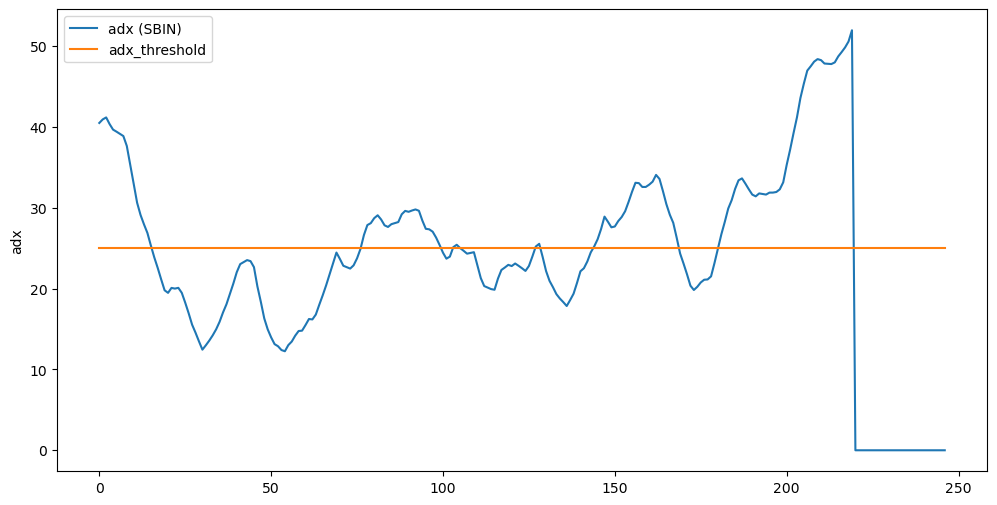

In [118]:
# ------------------------------------ generation of data frame --------------------------------------------
def generate_dataframe(symbol, today, lastday, train_data):
    # formatting the date
    to_day = int(today[:2])
    to_month = int(today[3:5])
    to_year = int(today[6:10])
    
    la_day = int(lastday[:2])
    la_month = int(lastday[3:5])
    la_year = int(lastday[6:10])
    
    df = pd.DataFrame(stock_df(symbol=symbol, from_date=date(to_year, to_month, to_day), to_date=date(la_year, la_month, la_day), series="EQ"))
    df = df[[ "DATE", "CLOSE", "HIGH", "LOW", "PREV. CLOSE", "VWAP", "NO OF TRADES", "OPEN"]]
    df = df.iloc[::-1]
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
    df['DATE'] = df['DATE'].dt.strftime('%d/%m/%Y')
    if (train_data == "0"):
        df.to_csv("Stocks/"+symbol+".csv", index=False)
    else:
        df.to_csv("Stocks/"+symbol+"_train.csv", index = False)
    
    adx(df)

# ----------------------------------------------- pickle --------------------------------------------------------
def write_pickle(DATA, symbol):
    pd.to_pickle(DATA, symbol + ".pkl")

# -------------------------------------------------------- MAIN -----------------------------------------------------------------------
def main():
    arguments = ["SBIN"]
    lastday = "01/01/2024"
    today = "01/01/2023"
    train_data = "0"
    for argument in arguments:
        generate_dataframe(argument, today, lastday, train_data)
    #write_pickle(DATA, "Stocks/" + argument)

if __name__ == "__main__":
    main()